<a href="https://colab.research.google.com/github/jcdumlao14/Projects/blob/main/StoreAnalysis_TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In today's retail industry, accurate forecasting is crucial for success. Retailers need to be able to predict demand for their products in order to maintain the right inventory levels and avoid overstocking or stockouts. Traditional forecasting methods are often subjective and lack the necessary data to make accurate predictions. However, with the advancements in machine learning, retailers now have access to sophisticated forecasting models that can analyze large amounts of data and make more accurate predictions. In this way, machine learning can help retailers optimize their inventory management, reduce waste, and improve customer satisfaction. This is particularly important in the grocery industry, where perishable goods and unpredictable product demand require retailers to be particularly strategic with their inventory management.

# **Import Modules**

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12,6)
plt.style.use('fivethirtyeight')

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")


# **Load the Datasets**

In [ ]:
# Read in the data
train = pd.read_csv('/content/train.csv')
stores = pd.read_csv('/content/stores.csv')
transactions = pd.read_csv('/content/transactions.csv')


In [ ]:
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [ ]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [ ]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


# **Merge the following datasets:**

* train.csv: Contains sales data for different stores and products.
* stores.csv: Contains information about the stores such as location and type.
* transactions.csv: Contains information about the number of transactions at each store on different dates.

Use the store_nbr column in the train.csv and stores.csv datasets to join them. Then, use the date and store_nbr columns in the train.csv and transactions.csv datasets to join them.

In [ ]:
# Merge the datasets
train = pd.merge(train, stores, on='store_nbr')
train = pd.merge(train, transactions, on=['date', 'store_nbr'])

# **Explore the merged dataset:**

* Check for missing values and outliers.
* Plot the distribution of the target variable (sales) using histograms, box plots, or kernel density estimates.
* Use scatter plots to visualize the relationship between sales and other variables such as promotions, store type, and location.

id              0
date            0
store_nbr       0
family          0
sales           0
onpromotion     0
city            0
state           0
type            0
cluster         0
transactions    0
dtype: int64


<Axes: >

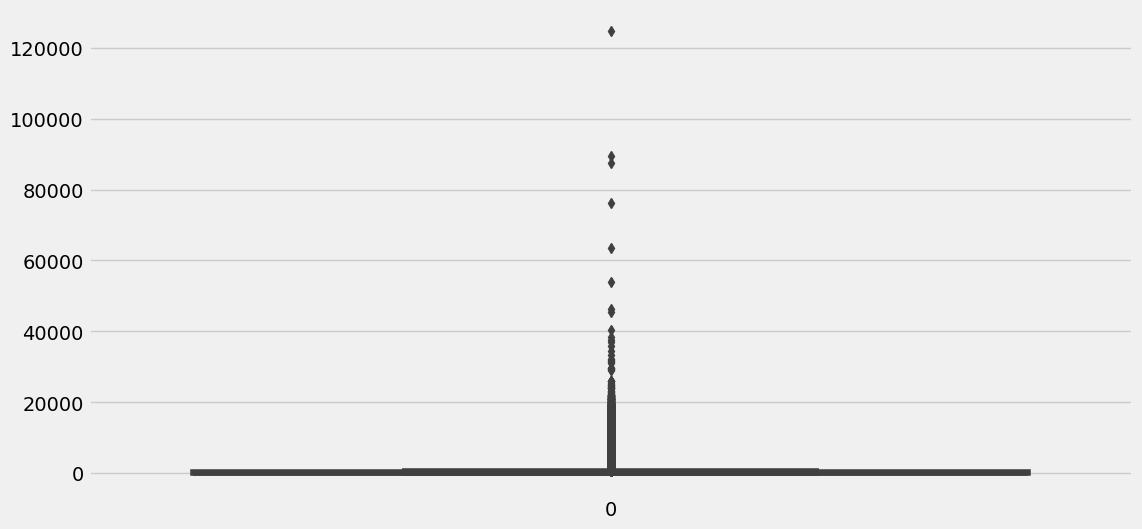

In [ ]:
# Check for missing values and outliers
print(train.isna().sum())
sns.boxplot(train['sales'])


<Axes: xlabel='sales'>

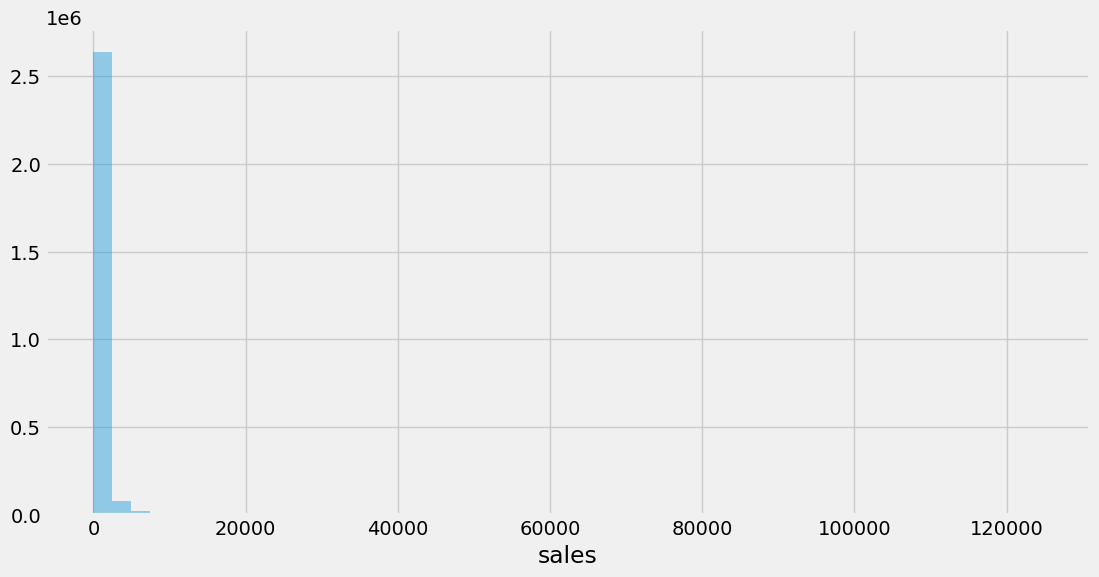

In [ ]:
sns.distplot(train['sales'], kde=False)

<Axes: xlabel='onpromotion', ylabel='sales'>

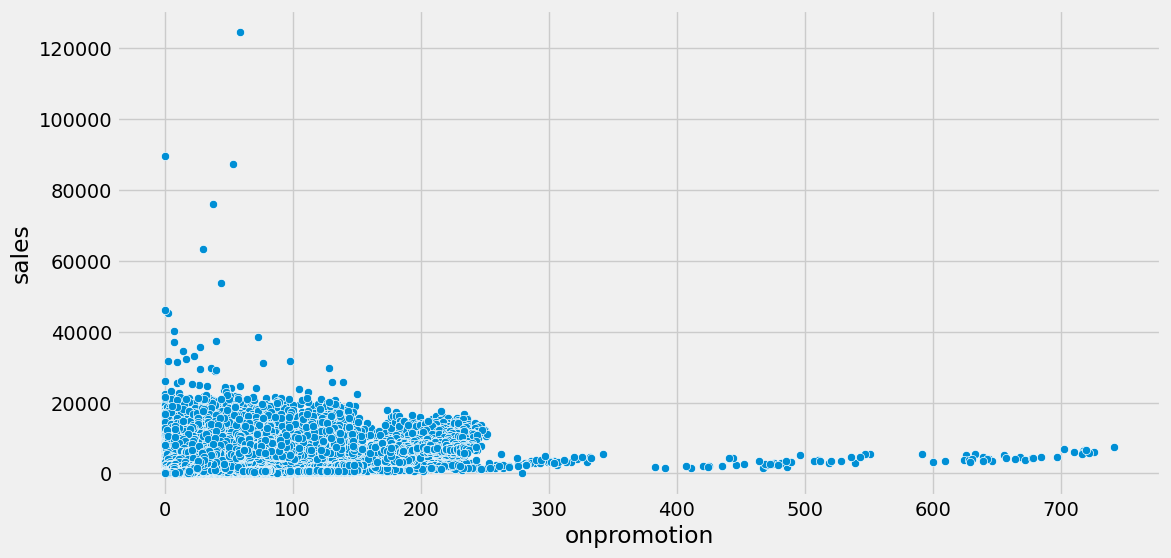

In [ ]:
sns.scatterplot(x='onpromotion', y='sales', data=train)

<Axes: xlabel='type', ylabel='sales'>

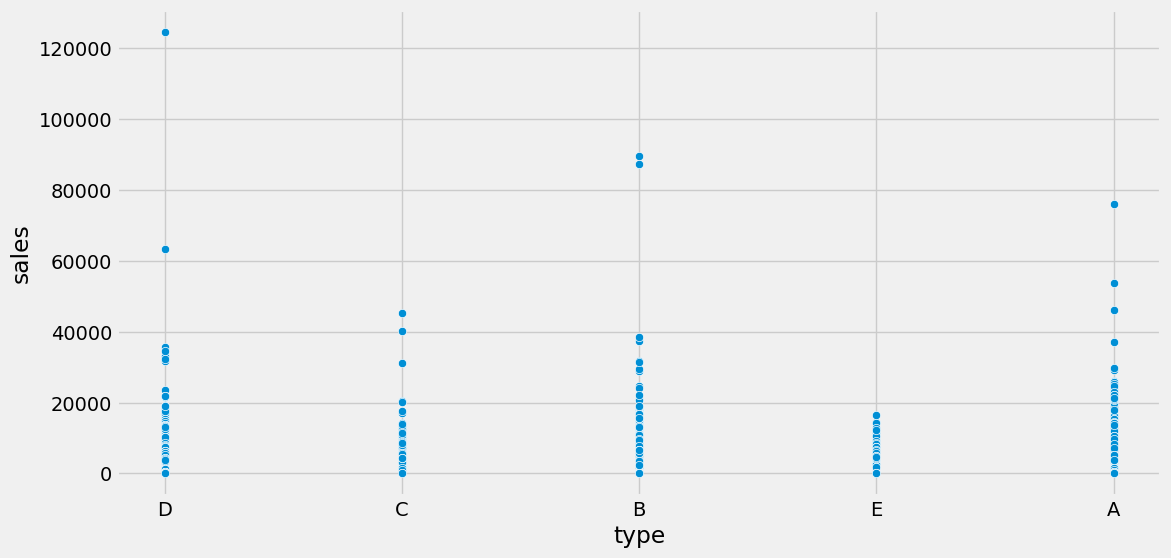

In [ ]:
sns.scatterplot(x='type', y='sales', data=train)

<Axes: xlabel='cluster', ylabel='sales'>

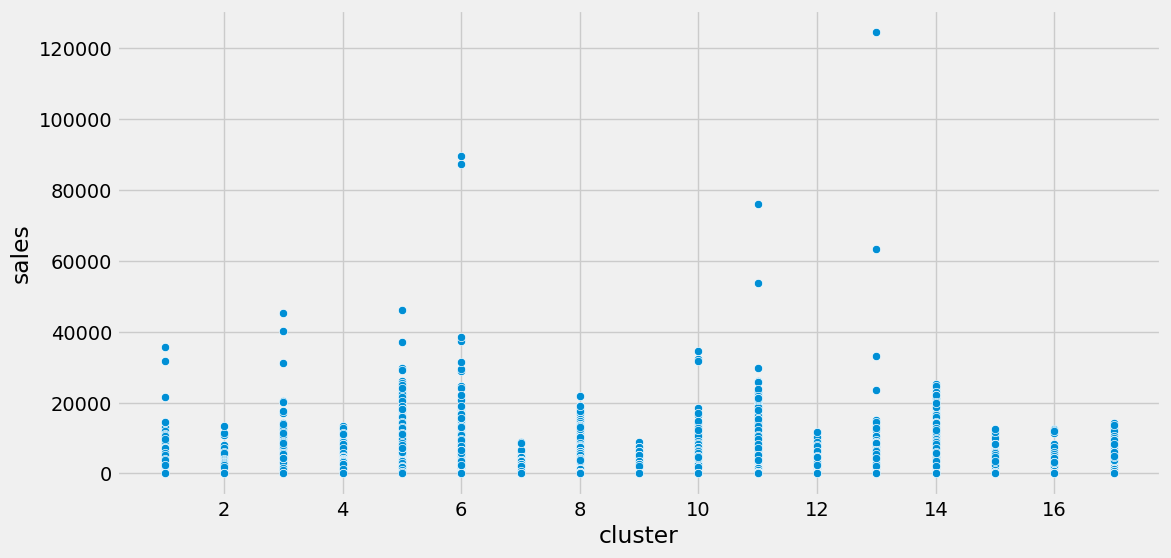

In [ ]:
sns.scatterplot(x='cluster', y='sales', data=train)

# **Preprocess the data:**

* Convert categorical variables to numerical using one-hot encoding or label encoding.
* Split the data into training and testing sets.

In [ ]:
# Preprocess the data
train = pd.get_dummies(train, columns=['family', 'type', 'city', 'state'])
X = train.drop(['id', 'date', 'sales'], axis=1)
y = train['sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# **Train and evaluate machine learning models:**

* Decision Tree Regressor
* Linear Regression

* Decision Tree Regressor: Fit a decision tree regressor model to the training data and evaluate its performance using MSE,and R2 score.

In [ ]:
# Train and evaluate machine learning models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

print('Decision Tree Results:')
print('MSE:', mean_squared_error(y_test, dt_pred))
print('R^2 Score:', r2_score(y_test, dt_pred))



Decision Tree Results:
MSE: 227173.12833321554
R^2 Score: 0.8255739332012086


* Linear Regression: Fit a linear regression model to the training data and evaluate its performance using mean squared error and R-squared.

Linear Regression Results:
MSE: 495189.8019940202
R^2 Score: 0.6197877358364472


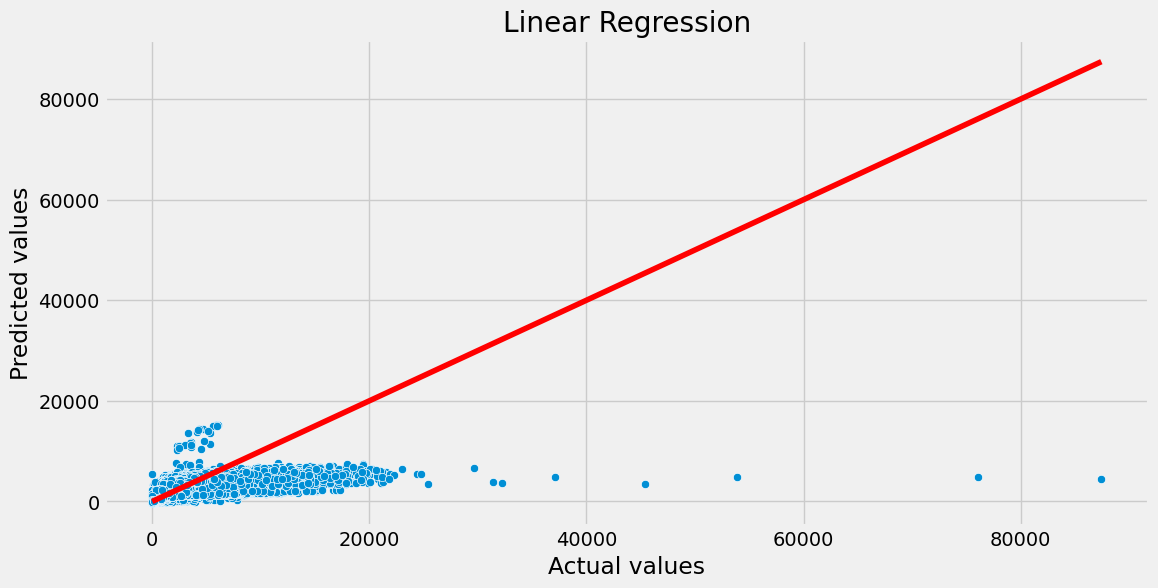

In [ ]:
import seaborn as sns

# Train and evaluate linear regression model
lm = LinearRegression()
lm.fit(X_train, y_train)
lm_pred = lm.predict(X_test)

print('Linear Regression Results:')
print('MSE:', mean_squared_error(y_test, lm_pred))
print('R^2 Score:', r2_score(y_test, lm_pred))

# Plot actual versus predicted values
sns.scatterplot(x=y_test, y=lm_pred)
sns.lineplot(x=y_test, y=y_test, color='red')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Linear Regression')
plt.show()


# **Visualize the results:**

* Use seaborn to plot the performance metrics of each model.
* Plot the feature importance of the decision tree model using a horizontal bar chart.


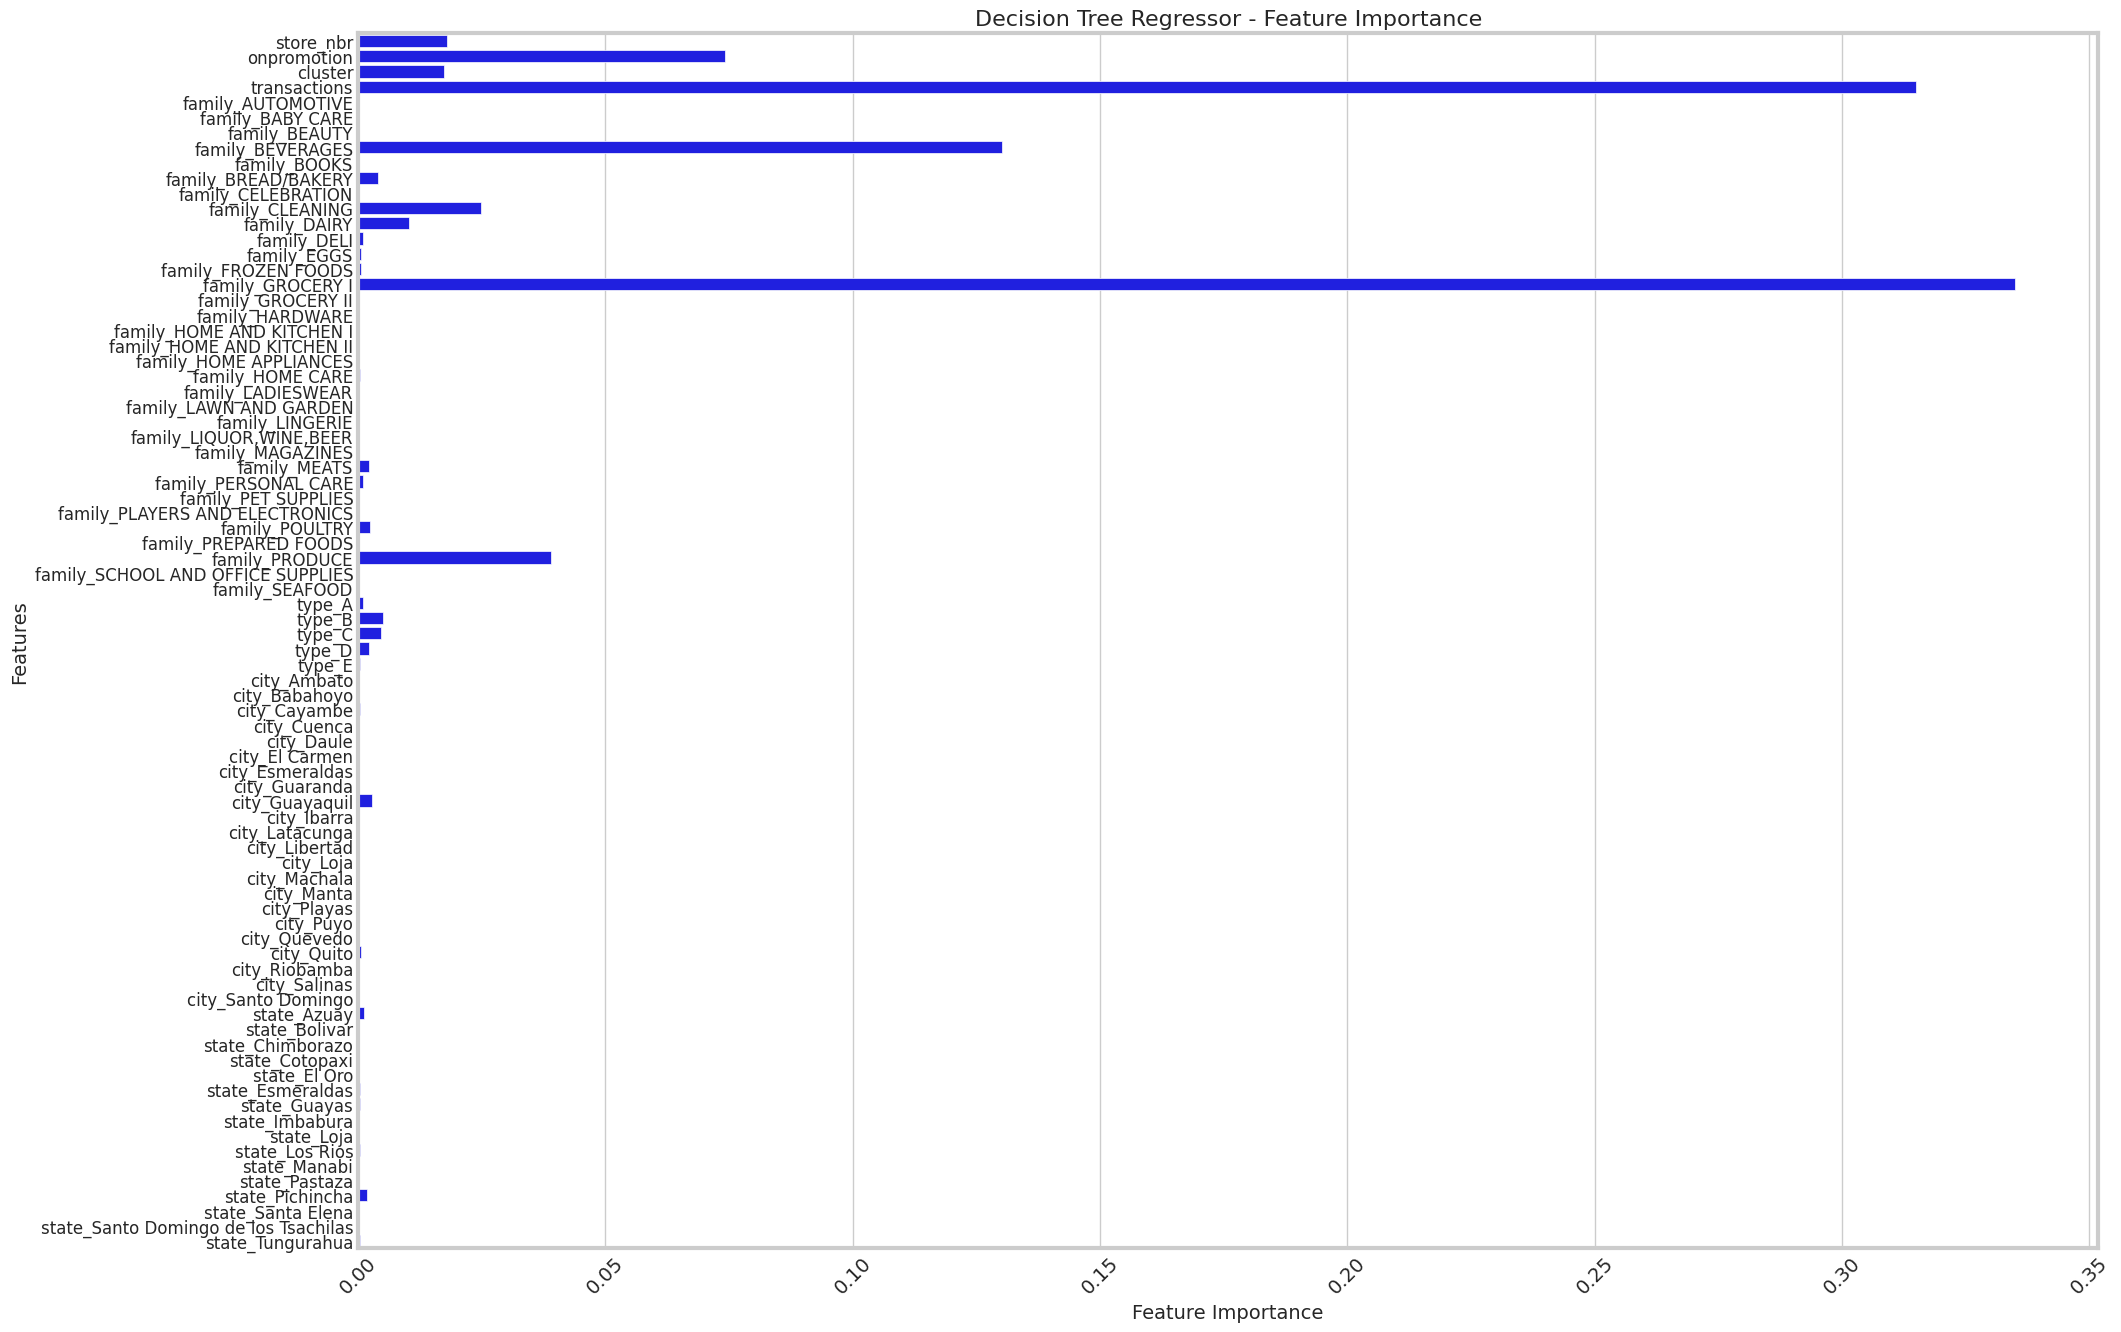

In [ ]:
# Visualize the results

# Train a decision tree regressor and get the feature importances
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

# Visualize the feature importances
fig, ax = plt.subplots(figsize=(20, 15))
sns.barplot(x=dt.feature_importances_, y=X.columns, ax=ax, color='b')

# Set the x-axis label and the font size
ax.set_xlabel('Feature Importance', fontsize=14)

# Set the y-axis label and the font size
ax.set_ylabel('Features', fontsize=14)

# Set the plot title and the font size
ax.set_title('Decision Tree Regressor - Feature Importance', fontsize=16)

# Set the font size of the tick labels on the y-axis
plt.yticks(fontsize=12)

# Rotate the tick labels on the y-axis
plt.xticks(rotation=45)

plt.show()


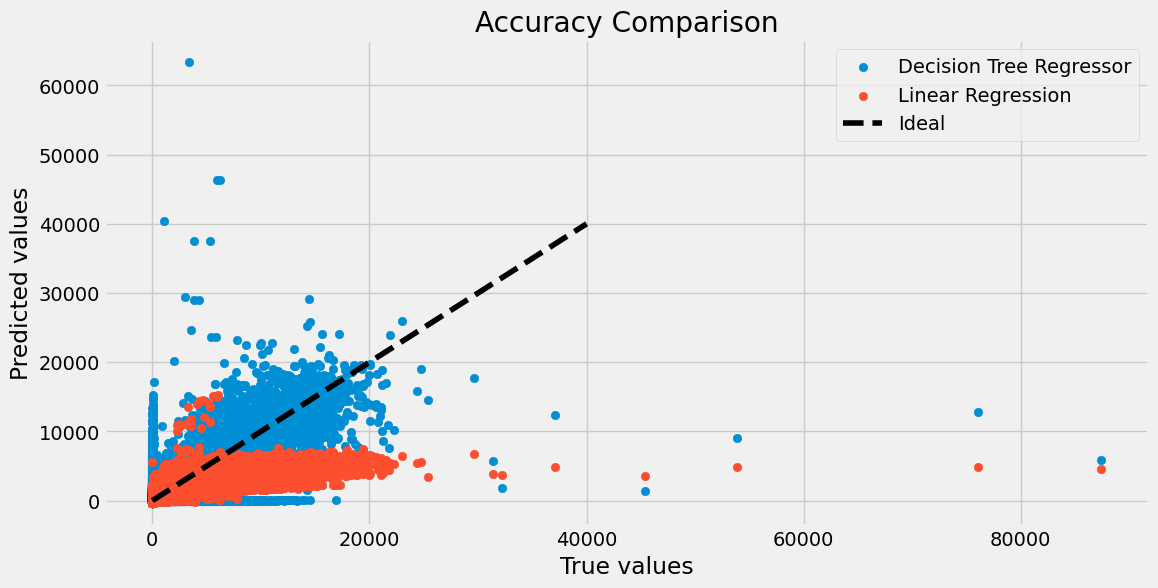

In [ ]:
import matplotlib.pyplot as plt

# Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_accuracy = r2_score(y_test, dt_pred)

# Linear Regression
lm = LinearRegression()
lm.fit(X_train, y_train)
lm_pred = lm.predict(X_test)
lm_accuracy = r2_score(y_test, lm_pred)

# Scatter plot
plt.scatter(y_test, dt_pred, label='Decision Tree Regressor')
plt.scatter(y_test, lm_pred, label='Linear Regression')
plt.plot([0, 40000], [0, 40000], 'k--', label='Ideal')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('Accuracy Comparison')
plt.legend()
plt.show()


Interpretation:

* We first read in the data and merge the datasets based on the columns 'store_nbr' and 'date'.
* We then checked for missing values and outliers, and plotted the distribution and scatter plots of the target variable 'sales' against other variables.
* After that, we preprocessed the data by converting categorical variables to numerical using one-hot encoding and splitting the data into training and testing sets.
* Next, we trained and evaluated two machine learning models - decision tree regressor and linear regression - using different performance metrics.


Overall, the goal of this analysis is to predict sales based on store and transaction information using different machine learning algorithms and visualize the results using various plots and charts.